In [1]:
import matplotlib.pyplot as plt
import numpy as np

def get_angles_from_positions(df_x, df_y, rotation_angle):
    """
    Given rotated x, y positions, reverse the rotation and compute angles (°).
    """
    theta = np.deg2rad(rotation_angle)
    x_original = df_x * np.cos(theta) + df_y * np.sin(theta)
    y_original = -df_x * np.sin(theta) + df_y * np.cos(theta)
    angles_rad = np.arctan2(x_original, y_original)
    angles_deg = np.rad2deg(angles_rad)
    return angles_deg


In [18]:
def plot_angle_and_size(df, size_column='radius', framerate=60,
                        use_degrees=True, undo_rotation_deg=45, unwrap=False):
    """
    Plots angular position (computed via get_angles_from_positions) and size over time.
    """
    time = np.arange(len(df)) / framerate

    angles = get_angles_from_positions(df['x'], df['y'], rotation_angle=undo_rotation_deg)

    if unwrap:
        angles = np.unwrap(np.radians(angles))
        angles = np.degrees(angles)

    angle_label = "Angle (°)" if use_degrees else "Angle (rad)"

    fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

    axs[0].plot(time, angles, label='Angular position', color='purple')
    axs[0].set_ylabel(angle_label, fontsize=12)
    axs[0].legend()

    axs[1].plot(time, df[size_column], label='Size', color='green')
    axs[1].set_ylabel('Size (cm)', fontsize=12)
    axs[1].set_xlabel('Time (s)', fontsize=12)
    axs[1].legend()

    axs[1].tick_params(axis='x', labelsize=10)
    axs[1].xaxis.set_major_locator(plt.MultipleLocator(0.5))
    axs[1].xaxis.set_minor_locator(plt.MultipleLocator(0.1))
    axs[1].grid(which='both', axis='x', linestyle=':', linewidth=0.5)

    plt.tight_layout()
    plt.show()

    # Print first and last angles (optional)
    print(f"Start angle: {angles[0]:.1f}°, End angle: {angles[-1]:.1f}°")


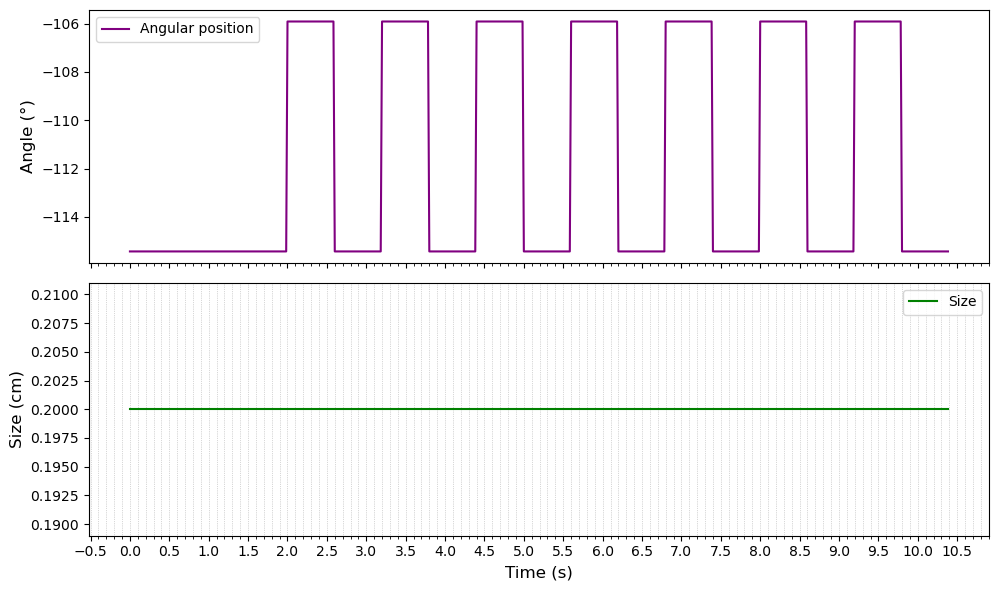

Start angle: -115.4°, End angle: -115.4°


In [21]:
import pandas as pd
import tkinter as tk
import numpy as np
from tkinter import filedialog

# Open file dialog
root = tk.Tk()
root.withdraw()
file_path = filedialog.askopenfilename(title="Select CSV or Excel file")

if not file_path:
    raise ValueError("No file selected")

# Load file
if file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
elif file_path.endswith('.xlsx'):
    df = pd.read_excel(file_path)
else:
    raise ValueError("Unsupported file format")

# Rename for plotting
df = df.rename(columns={'dot0_x': 'x', 'dot0_y': 'y', 'dot0_radius': 'radius'})

# Plot
plot_angle_and_size(df, size_column='radius', framerate=60, undo_rotation_deg=45, unwrap=True)


